In [1]:
''' 
Exercise: Outlier removal using standard deviation and z score
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result
'''

' \nExercise: Outlier removal using standard deviation and z score\nYou are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,\n\n(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles\n\n(2) After removing outliers in step 1, you get a new dataframe.\n\n(3) On step(2) dataframe, use 4 standard deviation to remove outliers\n\n(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram\n\n(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result\n'

In [1]:
import pandas as pd

df = pd.read_csv(r"D:\Carrer\AI\AI Er Learning\ML\Feature Engineering\2) Outlier_Z_Score\data\bhp.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [2]:
min_threshold,max_threshold = df['price_per_sqft'].quantile([0.001, 0.999])
min_threshold,max_threshold

(1366.184, 50959.36200000098)

In [3]:
df_no_outlier_percentile = df[(df['price_per_sqft']>min_threshold) & (df['price_per_sqft']<max_threshold)]
df_no_outlier_percentile

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [6]:
df_no_outlier_percentile.shape

(13172, 7)

In [11]:
df.shape[0]-df_no_outlier_percentile.shape[0]

28

In [7]:
lower_limit = df_no_outlier_percentile['price_per_sqft'].mean()-4*df_no_outlier_percentile['price_per_sqft'].std()
lower_limit

np.float64(-9900.429065502578)

In [8]:
upper_limit = df_no_outlier_percentile['price_per_sqft'].mean()+4*df_no_outlier_percentile['price_per_sqft'].std()
upper_limit

np.float64(23227.73653589432)

In [9]:
df_no_outlier_percentile_std = df_no_outlier_percentile[(df_no_outlier_percentile['price_per_sqft']>lower_limit) & (df_no_outlier_percentile['price_per_sqft']<upper_limit)]
df_no_outlier_percentile_std

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [12]:
df_no_outlier_percentile_std.shape

(13047, 7)

In [16]:
df_no_outlier_percentile.shape[0]-df_no_outlier_percentile_std.shape[0]

125

In [17]:
125+28

153

In [28]:
df_no_outlier_percentile_std.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13047.000000,13047.00000,13047.000000,13047.000000,13047.000000
mean,1529.296249,2.66613,105.850314,2.776270,6449.328045
std,948.777194,1.26673,118.818313,1.211623,3487.670005
min,250.000000,1.00000,8.000000,1.000000,1379.000000
25%,1100.000000,2.00000,50.000000,2.000000,4259.000000
50%,1270.000000,2.00000,70.000000,3.000000,5415.000000
75%,1660.000000,3.00000,117.500000,3.000000,7222.000000
max,30400.000000,27.00000,2340.000000,27.000000,23214.000000


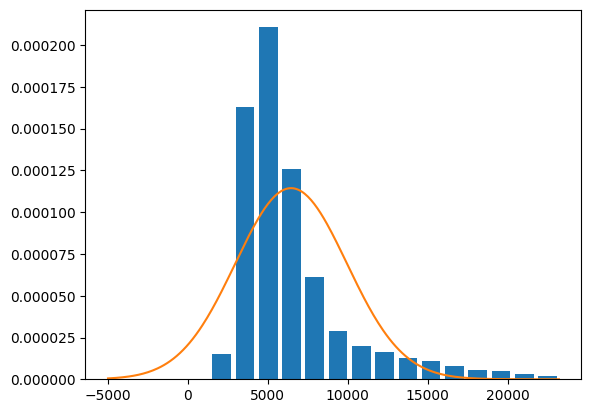

In [33]:
from scipy.stats import norm
from matplotlib import pyplot as plt
import numpy as np

plt.hist(df_no_outlier_percentile_std['price_per_sqft'],bins=15,rwidth=0.8,density=True)


rng = np.arange(-5000,df_no_outlier_percentile_std['price_per_sqft'].max(),100)
plt.plot(rng,norm.pdf(rng,df_no_outlier_percentile_std['price_per_sqft'].mean(),df_no_outlier_percentile_std['price_per_sqft'].std()))

In [25]:
df_no_outlier_percentile['zscore'] = (df_no_outlier_percentile['price_per_sqft']-df_no_outlier_percentile['price_per_sqft'].mean())/df_no_outlier_percentile['price_per_sqft'].std()
df_no_outlier_percentile

C:\Users\JenishGhimire\AppData\Local\Temp\ipykernel_8544\218329125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier_percentile['zscore'] = (df_no_outlier_percentile['price_per_sqft']-df_no_outlier_percentile['price_per_sqft'].mean())/df_no_outlier_percentile['price_per_sqft'].std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [26]:
df_no_outlier_percentile_zscore = df_no_outlier_percentile[(df_no_outlier_percentile['zscore']>-4) & (df_no_outlier_percentile['zscore']<4)]
df_no_outlier_percentile_zscore

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [27]:
df_no_outlier_percentile.shape[0]-df_no_outlier_percentile_zscore.shape[0]

125